In [ ]:
# Added some code here

In [4]:
from splinter import Browser
executable_path = {"executable_path": "chromedriver.exe"}
browser=Browser("chrome", **executable_path, headless=False)

In [5]:
browser.visit('https://www.linkedin.com')
# with open('search_results.txt', 'w', encoding='utf8') as f: 
#     f.write(browser.html)

In [9]:
from bs4 import BeautifulSoup

In [56]:
keyword='data scientist'
base_url=f'https://www.linkedin.com/jobs/search/?keywords={keyword}&start='
job_ids=[]
while len(job_ids)<100: 
    url=base_url+str(len(job_ids))
    browser.visit(url)
    time.sleep(3)
    soup=BeautifulSoup(browser.html)
    results=soup.find_all('div', class_='job-card-container')
    new_job_ids=[each_result['data-job-id'].split(':')[-1] for each_result in results]
    job_ids=job_ids+new_job_ids

In [104]:
job_list=[]
for each_job in job_ids: 
    job={}
    browser.visit(f'https://www.linkedin.com/jobs/search/?currentJobId={each_job}&pivotType=jymbii')
    time.sleep(5)
    soup=BeautifulSoup(browser.html)
    job['id']=each_job
    job['title']=soup.find('h2', class_='jobs-details-top-card__job-title').text.replace('\n', ' ').strip()
    job['description']=soup.find('div', class_='jobs-description__content').text.replace('\n', ' ').strip()
#     comps=soup.find_all('li', class_='salary-main-rail__data-item')
#     job['base_salary']=comps[0].find('p', class_='salary-main-rail__data-amount').text
#     job['total_comp']=comps[1].find('p', class_='salary-main-rail__data-amount').text
    job_list.append(job)

In [107]:
import pandas as pd
df=pd.DataFrame(job_list)
df.to_csv('job_list.csv')
df

id                                title  \
0    1903196373                       Data Scientist   
1    1751844747  Data Scientist, Apple Pay Analytics   
2    1749118289            Data Scientist, Decisions   
3    1940180769    Data Scientist, Finance Analytics   
4    1969041722   Data Scientist I, Machine Learning   
..          ...                                  ...   
97   1915739333          Wi-Fi Senior Data Scientist   
98   1952918358                 Data Scientist (NLP)   
99   1852362352                       Data Scientist   
100  1940171426        Senior Product Data Scientist   
101  1948851579                Senior Data Scientist   

                                           description  
0    Description  Business/Team Introduction The Su...  
1    Summary  We are looking for a hardworking and ...  
2    At Lyft, our mission is to improve people’s li...  
3    Zoom is an award-winning workplace. We have be...  
4    Coursera is a leading online learning platform...  
..                                                 ...  
97   Job Summary  Join a small, highly skilled data...  
98   Exciting opportunity for a Data Scientist who ...  
99   Job Description  Strong background in machine ...  
100  About Bill.com  Bill.com is a leading provider...  
101  The world’s first customer platform helping in...  

[102 rows x 3 columns]

In [148]:
df['length']=df['description'].map(len)
all_description=df['description'].str.lower().str.cat(sep=' ')
df

id                                title  \
0    1903196373                       Data Scientist   
1    1751844747  Data Scientist, Apple Pay Analytics   
2    1749118289            Data Scientist, Decisions   
3    1940180769    Data Scientist, Finance Analytics   
4    1969041722   Data Scientist I, Machine Learning   
..          ...                                  ...   
97   1915739333          Wi-Fi Senior Data Scientist   
98   1952918358                 Data Scientist (NLP)   
99   1852362352                       Data Scientist   
100  1940171426        Senior Product Data Scientist   
101  1948851579                Senior Data Scientist   

                                           description  length  
0    Description  Business/Team Introduction The Su...    4581  
1    Summary  We are looking for a hardworking and ...    3359  
2    At Lyft, our mission is to improve people’s li...    3854  
3    Zoom is an award-winning workplace. We have be...    2529  
4    Coursera is a leading online learning platform...    4932  
..                                                 ...     ...  
97   Job Summary  Join a small, highly skilled data...    2461  
98   Exciting opportunity for a Data Scientist who ...    1270  
99   Job Description  Strong background in machine ...     755  
100  About Bill.com  Bill.com is a leading provider...    3676  
101  The world’s first customer platform helping in...    5096  

[102 rows x 4 columns]

In [182]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

stop_words=set(stopwords.words('english'))
word_tokenize=word_tokenize(all_description)
alpha_word_tokenize=[word for word in word_tokenize if word.isalpha()]
filtered_tokenize=[word for word in alpha_word_tokenize if not word in stop_words]
ngram_two=list(ngrams(filtered_tokenize, 2))
# list(ngram_two)
all_tokens=ngram_two+filtered_tokenize
term_freq={}
for token in all_tokens: 
# for token in filtered_tokenize: 
    if token in term_freq: 
        term_freq[token]+=1
    else: 
        term_freq[token]=1

In [207]:
import math
sort_freq=sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
top_terms_freq=sort_freq[:100]
top_terms_dict={}
# type(sort_freq[11])==tuple
for each_term_freq in top_terms_freq: 
    if type(each_term_freq[0])==tuple: 
        top_terms_dict[' '.join(each_term_freq[0])]=math.log(each_term_freq[1])
    else: 
        top_terms_dict[each_term_freq[0]]=math.log(each_term_freq[1])

In [208]:
top_terms_dict

{'data': 6.854354502255021,
 'experience': 5.934894195619588,
 'business': 5.793013608384144,
 'team': 5.537334267018537,
 'science': 5.488937726156687,
 'learning': 5.4680601411351315,
 'product': 5.313205979041787,
 'engineering': 5.25227342804663,
 'work': 5.247024072160486,
 'machine': 5.231108616854587,
 'information': 5.220355825078324,
 'machine learning': 5.159055299214529,
 'technology': 5.147494476813453,
 'job': 5.117993812416755,
 'analysis': 5.056245805348308,
 'skills': 5.0238805208462765,
 'data science': 5.017279836814924,
 'employment': 4.997212273764115,
 'industry': 4.990432586778736,
 'level': 4.990432586778736,
 'computer': 4.948759890378168,
 'analytics': 4.9344739331306915,
 'years': 4.844187086458591,
 'new': 4.812184355372417,
 'insights': 4.787491742782046,
 'information technology': 4.77912349311153,
 'match': 4.77912349311153,
 'models': 4.7535901911063645,
 'functions': 4.709530201312334,
 'services': 4.68213122712422,
 'scientist': 4.653960350157523,
 'typ

In [217]:
import wordcloud
import random
# sample=random.sample(filtered_tokenize, 100)
# wordcloud=wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(filtered_tokenize))
# wordcloud=wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(sample))
wordcloud=wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=20).generate_from_frequencies(top_terms_dict)

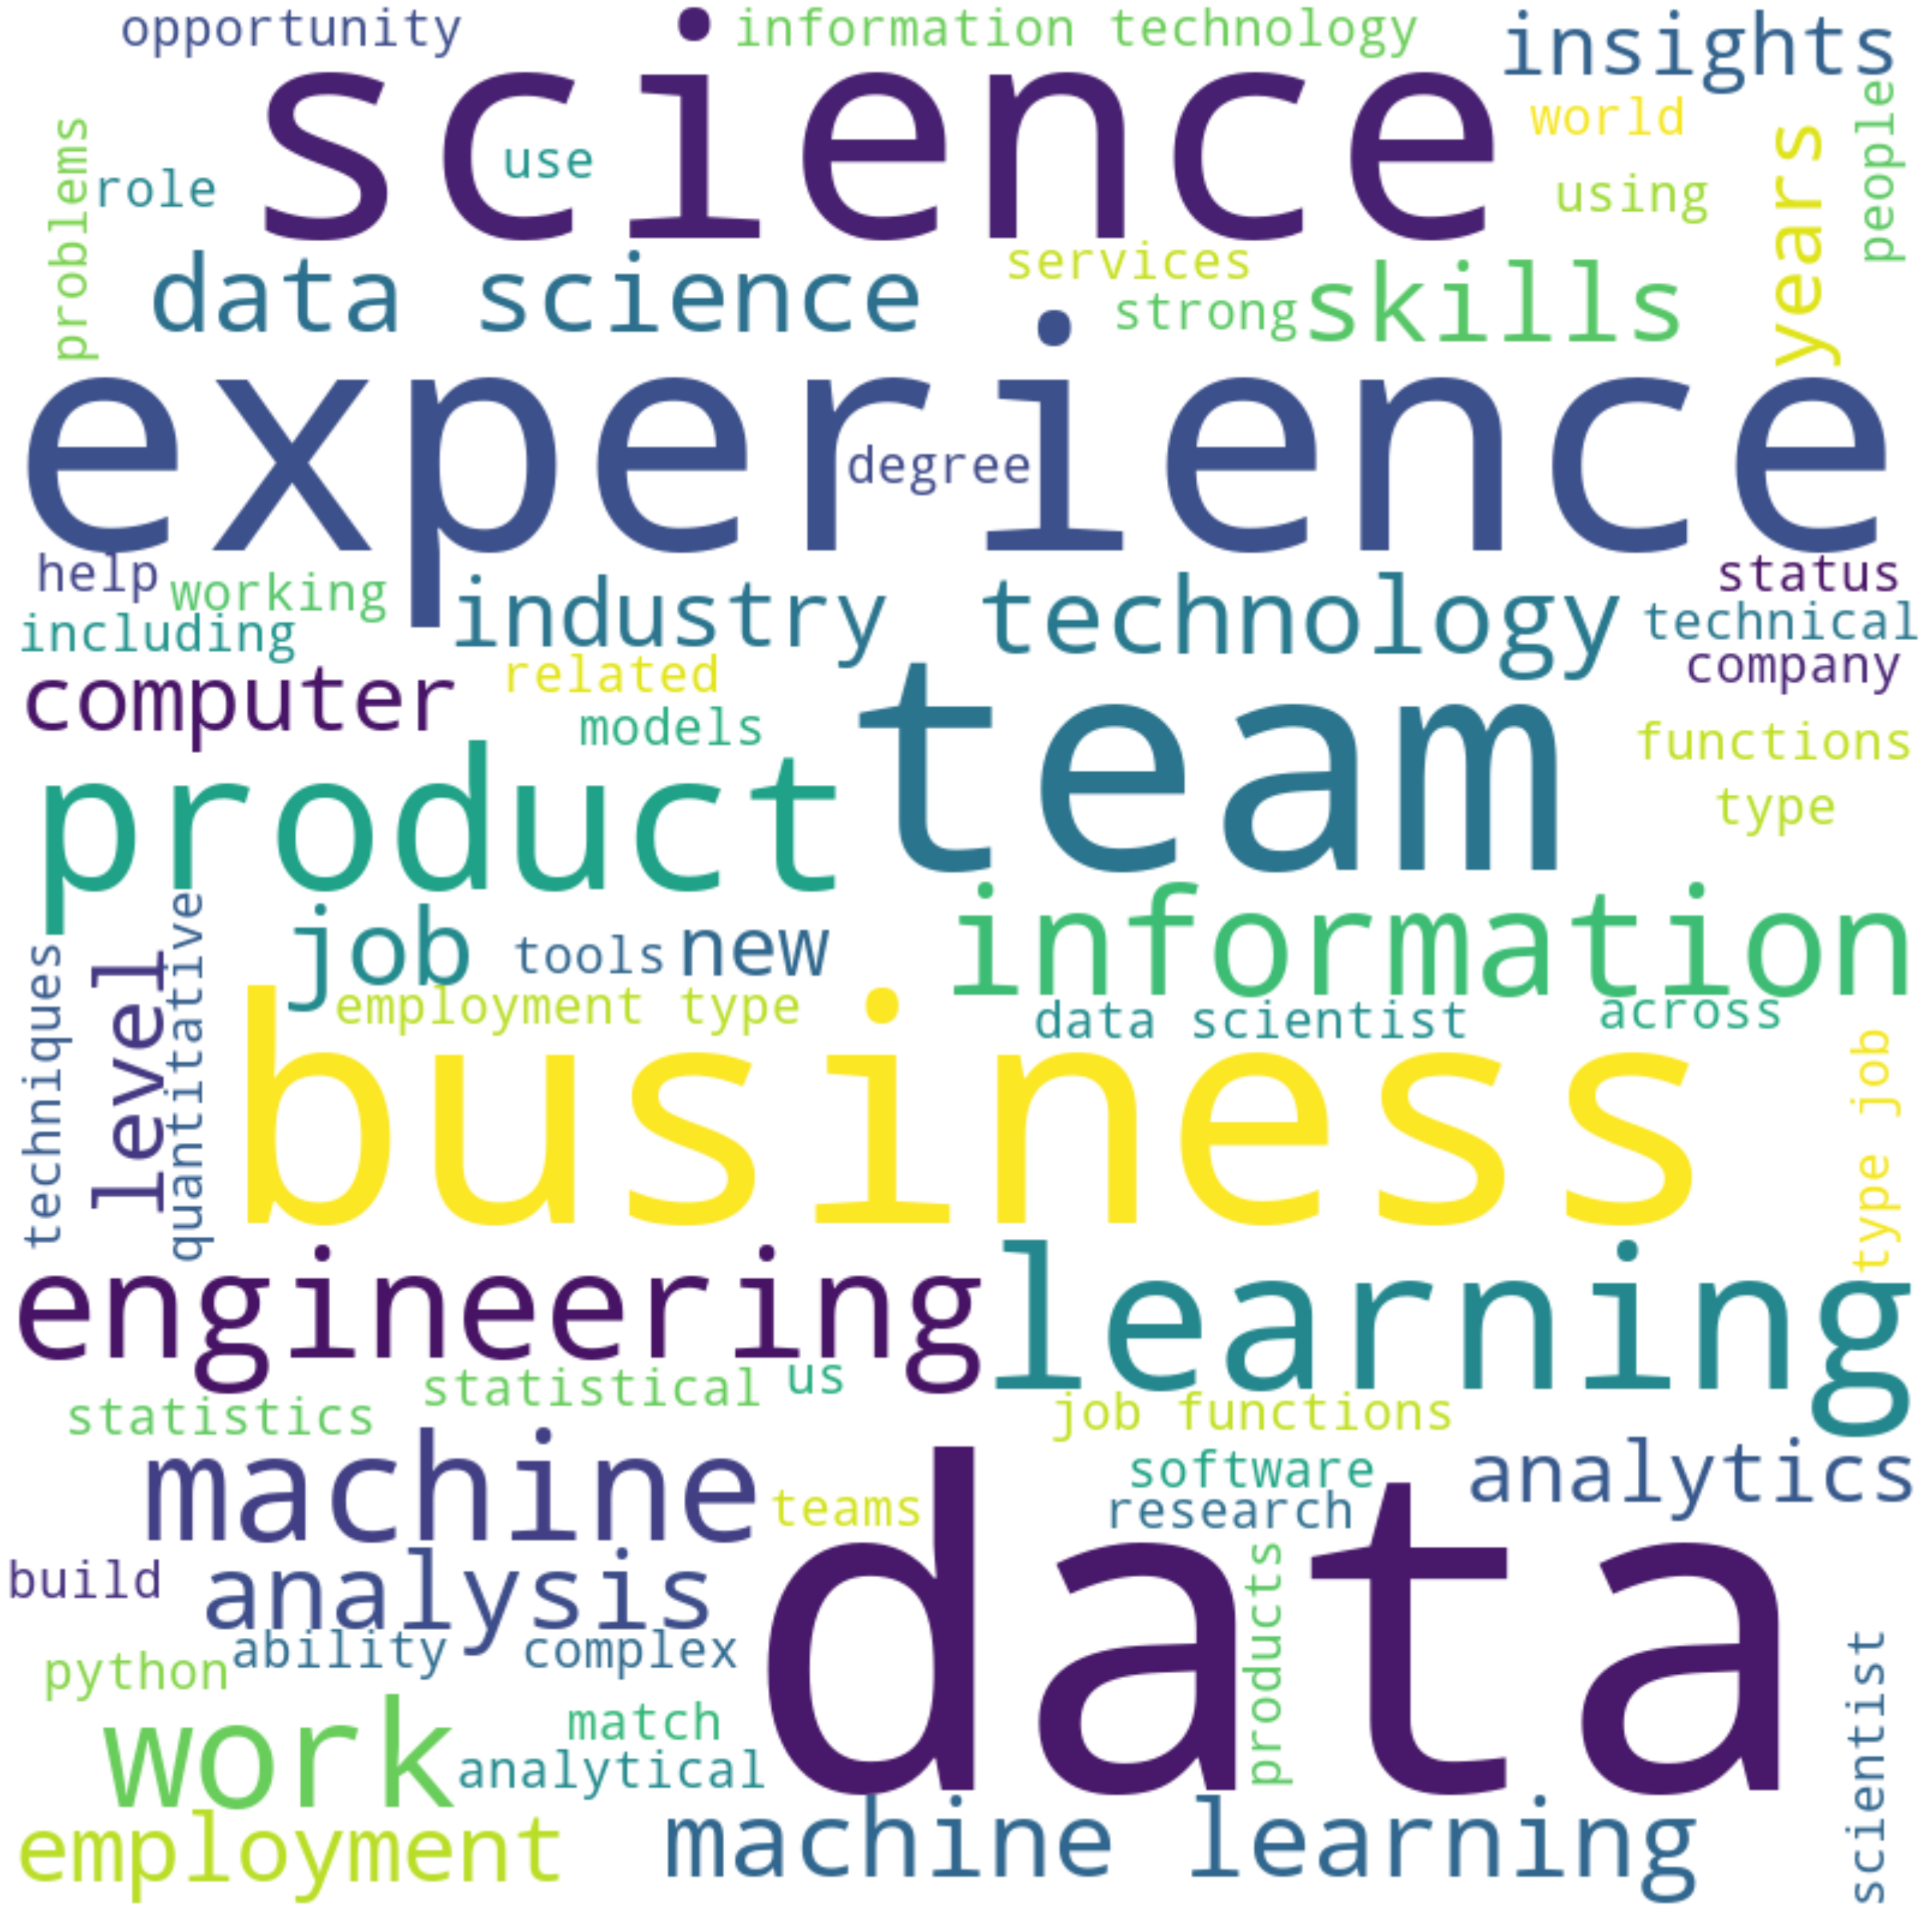

In [219]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [221]:
wordcloud.to_file('wordcloud.png')

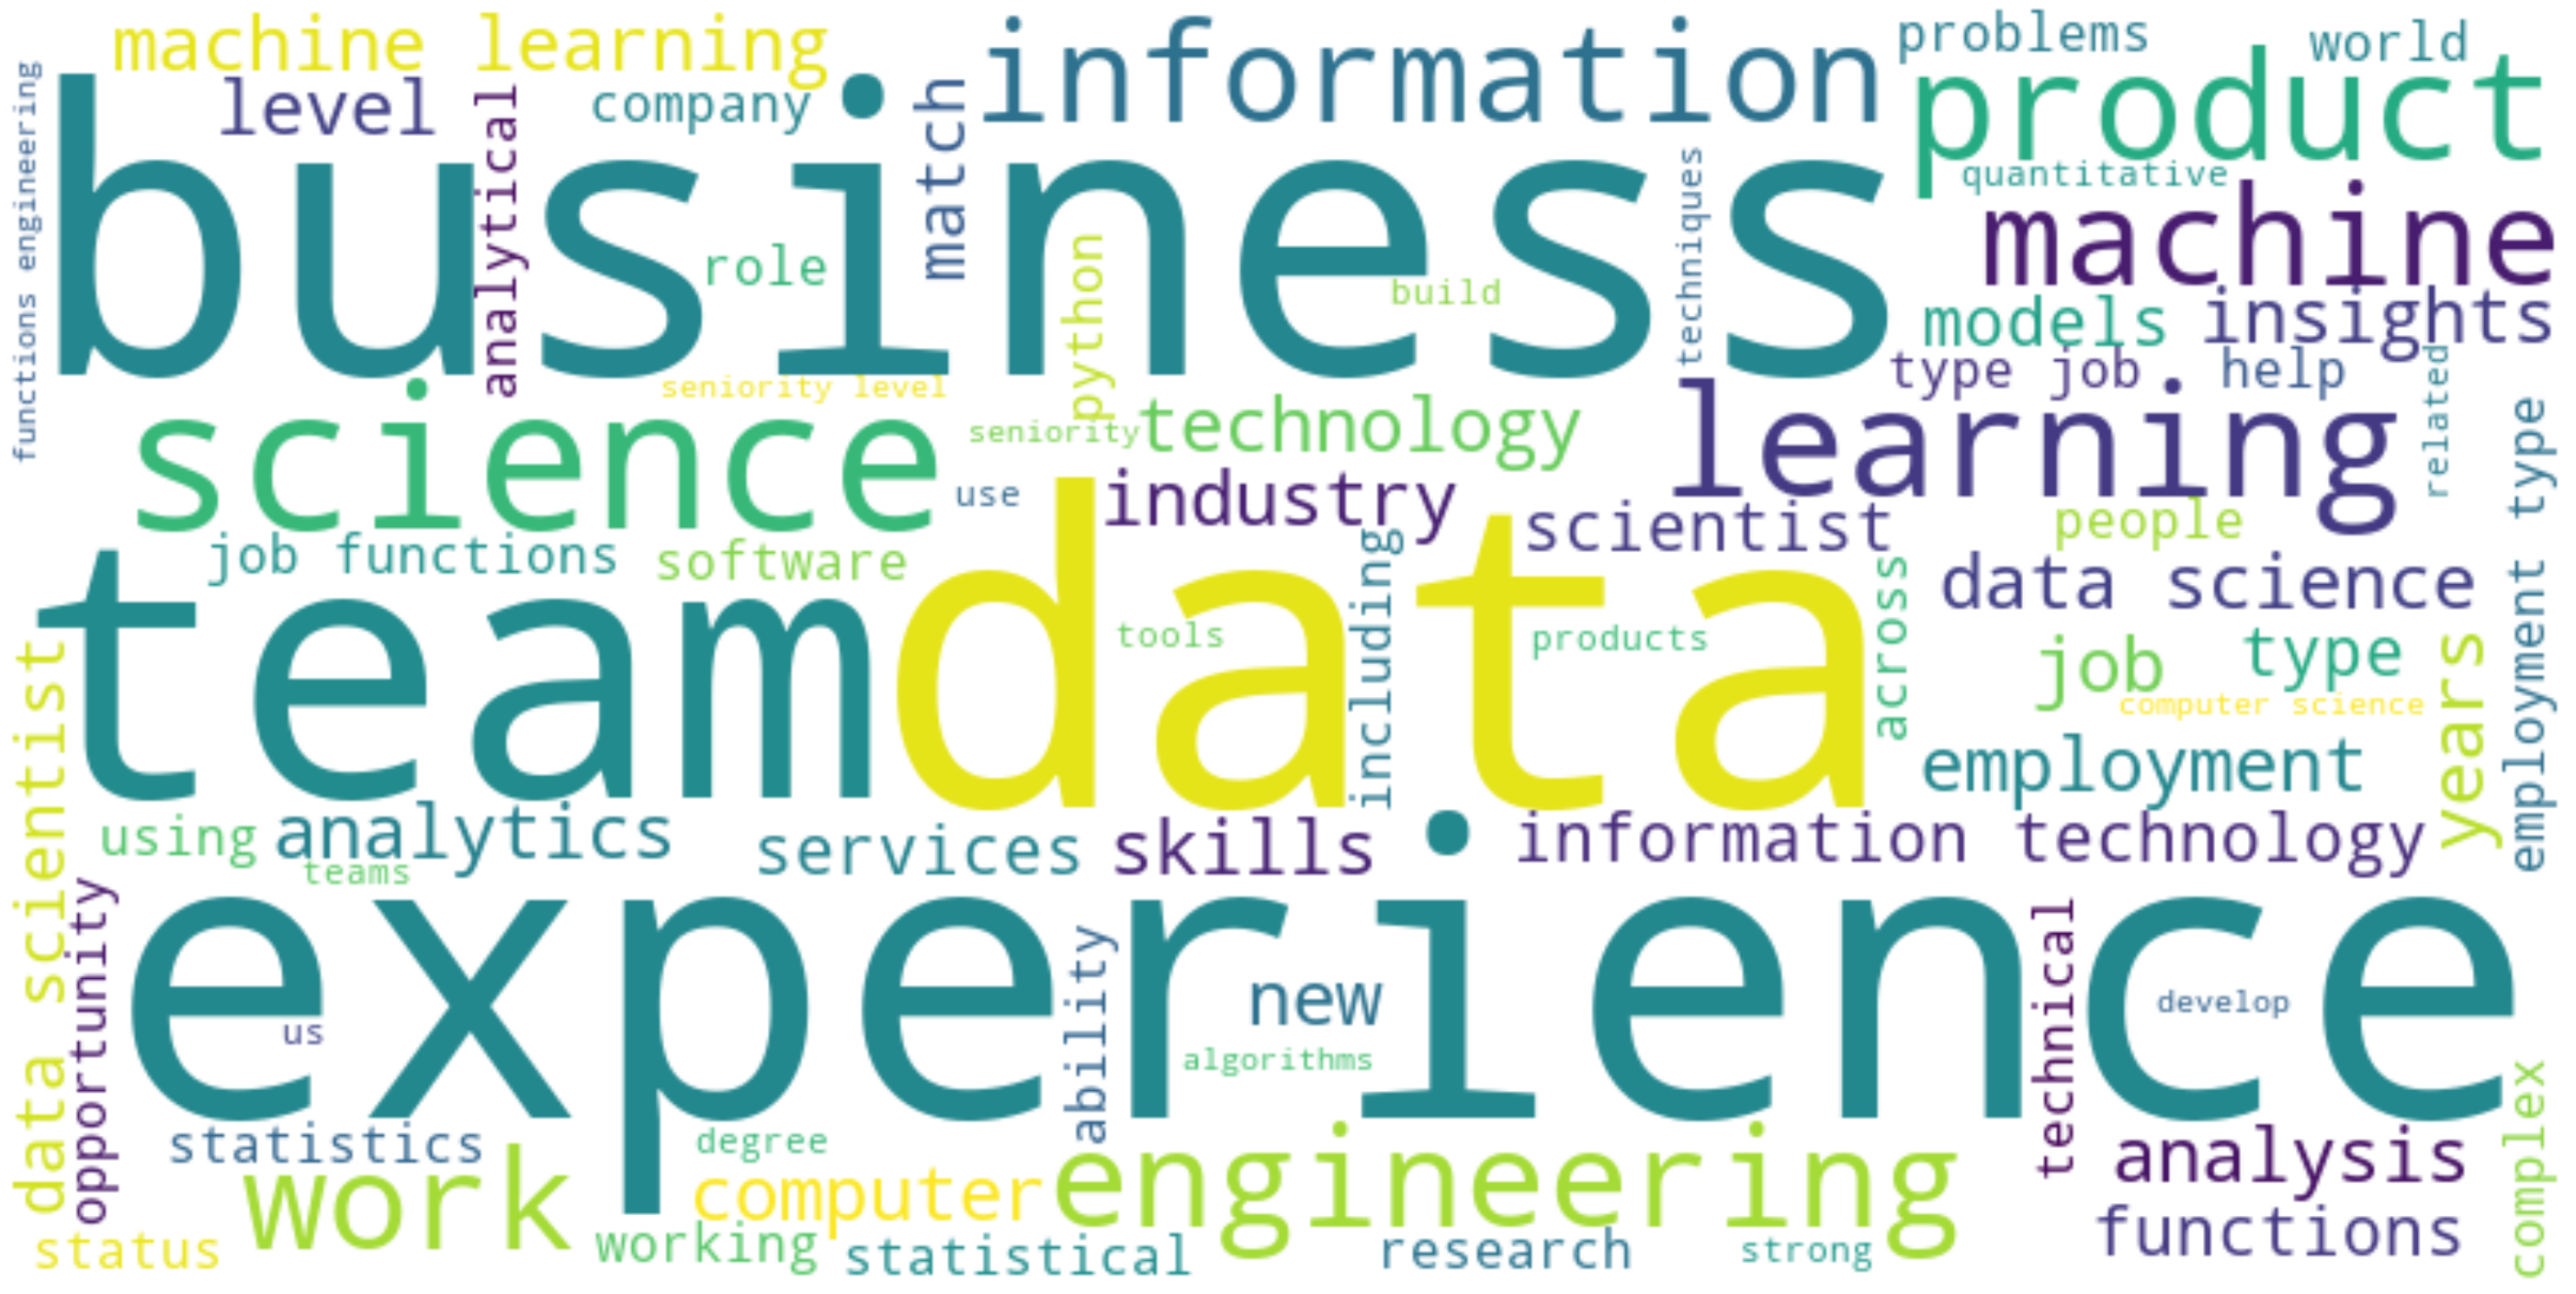

In [224]:
import wordcloud
wordcloud=wordcloud.WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate_from_frequencies(top_terms_dict)
plt.figure(figsize=(50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [225]:
wordcloud.to_file('wordcloud_small.png')